# ![](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/did_you_know_this_could_lead_to_heart_disease_slideshow/493ss_thinkstock_rf_heart_illustration.jpg) Modeling For Heart Attacks...

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   #importing libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
# import LinearSVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, \
recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 

### Import Datasets

datasource : https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/National-Vital-Statistics-System-NVSS-National-Car/kztq-p2jf

In [2]:
stroke = pd.read_csv('./datasets/stroke.csv') #importing the dataset

In [3]:
stroke.head()

,Year,LocationAbbr,LocationDesc,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,LowConfidenceLimit,...,Break_Out_Non-Hispanic White,Break_Out_Other,Break_Out_Overall,Topic_Acute Myocardial Infarction (Heart Attack),Topic_Coronary Heart Disease,Topic_Diseases of the Heart (Heart Disease),Topic_Heart Failure,Topic_Major Cardiovascular Disease,Topic_Stroke,AvgConfidenceLimit
0,2013,IL,Illinois,Cardiovascular Diseases,Stroke,Rate of ischemic stroke mortality among US adu...,0,"Rate per 100,000",30.0,30.0,...,0,0,0,0,0,0,0,0,1,1.000000
1,2000,MT,Montana,Cardiovascular Diseases,Major Cardiovascular Disease,Rate of major cardiovascular disease mortality...,0,"Rate per 100,000",362.3,358.6,...,0,1,0,0,0,0,0,1,0,0.806205
2,2001,KS,Kansas,Cardiovascular Diseases,Stroke,Rate of ischemic stroke mortality among US adu...,1,"Rate per 100,000",24.1,23.5,...,0,0,0,0,0,0,0,0,1,0.679191
3,2004,AL,Alabama,Cardiovascular Diseases,Stroke,Rate of ischemic stroke mortality among US adu...,1,"Rate per 100,000",1.6,1.6,...,0,0,0,0,0,0,0,0,1,0.640000
4,2002,OH,Ohio,Cardiovascular Diseases,Major Cardiovascular Disease,Rate of major cardiovascular disease mortality...,1,"Rate per 100,000",28.0,27.9,...,0,0,0,0,0,0,0,1,0,0.992883


### Defining Variables

In [4]:
# Defining X and y variables
X = stroke[['Data_Value','HighConfidenceLimit','LowConfidenceLimit','AvgConfidenceLimit','Data_Value_Type','LocationID','Year','Break_Out_Category_Age','Break_Out_Category_Gender','Break_Out_Category_Overall','Break_Out_Category_Race','Break_Out_18-24','Break_Out_25-44','Break_Out_35+','Break_Out_45-64','Break_Out_65+','Break_Out_75+','Break_Out_Female','Break_Out_Hispanic','Break_Out_Male','Break_Out_Non-Hispanic Black','Break_Out_Non-Hispanic White','Break_Out_Other','Break_Out_Overall']]
y= stroke['Topic_Acute Myocardial Infarction (Heart Attack)']

In [5]:
# doing train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.33,
    random_state = 42
)

In [6]:
sc = StandardScaler() #scaling the data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Random Forest Classifier

In [7]:
rf = RandomForestClassifier(n_estimators=200,max_depth=22,min_samples_leaf=10,min_samples_split=10) #initiating the RF model

In [8]:
model = rf.fit(X_train_sc,y_train) #fitting the model

In [9]:
model.score(X_train_sc,y_train) #calculating the train score

0.8966830681619502

In [10]:
model.score(X_test_sc,y_test) #calculating the test score

0.8811105476673428

It is a good score. the predictive score of 88% is good and the plan is not overfit. We can tell with 88% certainity that which category affects Heart Attack the most

In [11]:
# value count
y.value_counts(normalize=True)

0    0.872559
1    0.127441
Name: Topic_Acute Myocardial Infarction (Heart Attack), dtype: float64

### ExtraTrees Classifier

In [12]:
et = ExtraTreesClassifier(n_estimators=200,max_depth=22,min_samples_leaf=6) #initiating the ET model

In [13]:
et.fit(X_train,y_train) #fitting the model

ExtraTreesClassifier(max_depth=22, min_samples_leaf=6, n_estimators=200)

In [14]:
et.score(X_train,y_train) #calculating the train score

0.8878287583984814

In [15]:
et.score(X_test,y_test) #calculating the test score

0.8789807302231237

It is a good score. the predictive score of 87% is good and the plan is not overfit. We can tell with 87% certainity that which category affects Heart Attack the most

### Confusion Matrix

In [16]:
# Predict off the scaled version of X_test
y_preds = rf.predict(X_test_sc)

In [17]:
# As this is a binary classification problem, the confusion matrix will be a 
# 2x2 numpy array. If this were a multiclass problem the matrix would grow to meet 
# the number of options or classes in your target variable.
cm = confusion_matrix(y_test, y_preds); cm

array([[34073,   204],
       [ 4485,   678]], dtype=int64)

In [18]:
#Checking the postives and negatives of the model
tn = cm[0, 0]; print("True Negatives:", tn)
tp = cm[1, 1]; print("True Positives:", tp)
fp = cm[0, 1]; print("False Positives:", fp)
fn = cm[1, 0]; print("False Negatives:", fn)

True Negatives: 34073
True Positives: 678
False Positives: 204
False Negatives: 4485


In [19]:
confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
print("Woohoo- got them 'right'")
print("true negatives:", tn)
print("true positive:", tp)
print("------------------------------")
print("Misclassified")
print("false positives:", fp)
print("false negatives:", fn)

Woohoo- got them 'right'
true negatives: 34073
true positive: 678
------------------------------
Misclassified
false positives: 204
false negatives: 4485


In this Confusion Matrix, we can better explain the outcome

- True negatives means that we correctly pridicted the people who don't have Heart Attack
- True positives means that we correctly predicted the people who have Heart Attack
- False positives means that we incorrectly predicted the people who have Heart Attack(who actually don't have Heart Attack)
- False negatives means that we incorrectly predicted the people who don't have Heart Attack(who actually have Heart Attack)

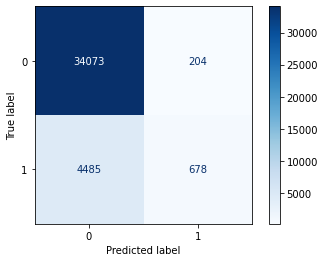

In [20]:
from sklearn.metrics import plot_confusion_matrix #plotting confusion matrix
plot_confusion_matrix(rf, X_test_sc, y_test, cmap='Blues', values_format='d');

Accuracy = Number of correct predictions Total number of predictions

In [21]:
#Accuracy = All correct / all
Accuracy = tp + tn / tp + tn + fp + fn
Accuracy

39490.25516224189

In [22]:
# What is the test specificity of our model?

spec = tn / (tn + fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.994


Test Specificity is the ability of the test to correctly identify those without the disease (true negative rate)

In [23]:
# What is the test sensitivity of our model?

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.1313


Test Sensitivity is the ability of a test to correctly identify those with the disease (true positive rate)

In [24]:
rf.predict_proba(X_test)[:10]

#lr.predict_proba(X_test)[:, 0][:10]
#lr.predict_proba(X_test)[:, 1][:10]


# The first row for example...

# 0.99168003 is the probability that the output will be 0 (Basically ~99% probability)
# 0.00831997 is the probability that the output will be 1 (Basically sub 1% probability)

array([[0.99414741, 0.00585259],
       [0.94939246, 0.05060754],
       [0.99414741, 0.00585259],
       [0.99414741, 0.00585259],
       [0.99414741, 0.00585259],
       [0.99414741, 0.00585259],
       [0.94939246, 0.05060754],
       [0.99414741, 0.00585259],
       [0.99628336, 0.00371664],
       [0.99414741, 0.00585259]])

In [25]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in rf.predict_proba(X_test)]

# The value of each y along with the probability of being 1
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [26]:
pred_df.head(10)
pred_df.tail(10)

,true_values,pred_probs
89550,0,0.003717
32684,1,0.005853
32273,0,0.050608
21528,0,0.002675
33470,0,0.003717
57468,0,0.003717
16797,0,0.005853
36585,1,0.005853
80305,0,0.010389
108164,0,0.050608


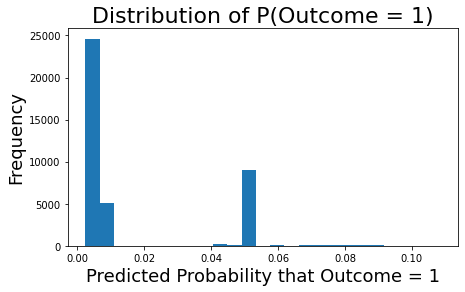

In [27]:
# Create figure.
plt.figure(figsize = (7,4))

# Create histogram of observations.
plt.hist(pred_df['pred_probs'], bins = 25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18);

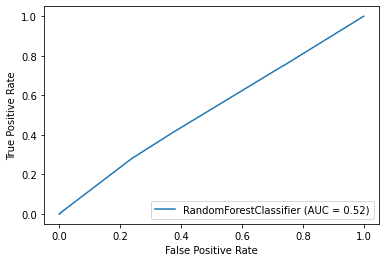

In [28]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test);

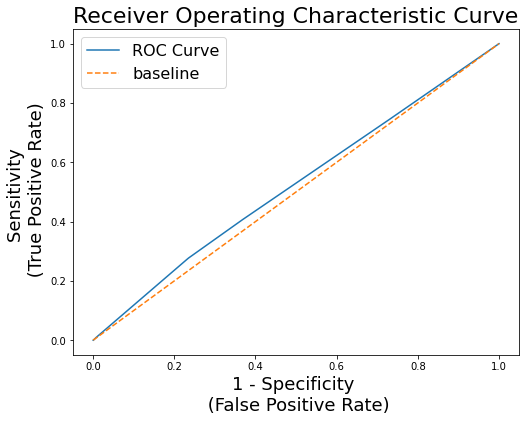

In [29]:
# Create figure.
plt.figure(figsize = (8,6))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity \n (True Positive Rate)', fontsize=18)
plt.xlabel('1 - Specificity \n (False Positive Rate)', fontsize=18)

# Create legend.
plt.legend(fontsize=16);